In [2]:
import os
import cv2
import numpy as np
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [3]:
data_path='D:/Course/Deep Learning/data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

In [4]:
def load_split(data_Path,categories):

    data = []
    labels = []
    img_size=100
   

    for category in categories:
        folder_path=os.path.join(data_path,category)
        img_names=os.listdir(folder_path)

        for img_name in img_names:
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)       
            resized=cv2.resize(gray,(img_size,img_size))
               
            data.append(resized)
            labels.append(label_dict[category])
               
     
    
    data=np.array(data)/255.0
    data=np.reshape(data,(data.shape[0],img_size,img_size,1))
    labels = np.array(labels)
    
    return (data, labels)


In [5]:
data,labels=load_split('D:/Course/Deep Learning/data',categories)

In [6]:
from keras.utils import np_utils

new_labels=np_utils.to_categorical(labels)

In [7]:
cnn = models.Sequential([
    layers.Conv2D(filters=200, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])


In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 52900)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [9]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split

trainX,testX,trainY,testY=train_test_split(data,new_labels,test_size=0.3)

In [11]:
cnn.fit(trainX, trainY, epochs=10)

Epoch 1/10
166/166 [==============================] - 112s 670ms/step - loss: 0.6421 - accuracy: 0.6412
Epoch 2/10
166/166 [==============================] - 111s 670ms/step - loss: 0.5397 - accuracy: 0.7187
Epoch 3/10
166/166 [==============================] - 110s 665ms/step - loss: 0.4515 - accuracy: 0.7838
Epoch 4/10
166/166 [==============================] - 1245s 8s/step - loss: 0.3471 - accuracy: 0.8468
Epoch 5/10
166/166 [==============================] - 111s 670ms/step - loss: 0.2610 - accuracy: 0.8886
Epoch 6/10
166/166 [==============================] - 351s 2s/step - loss: 0.1598 - accuracy: 0.9368
Epoch 7/10
166/166 [==============================] - 112s 674ms/step - loss: 0.0973 - accuracy: 0.9637
Epoch 8/10
166/166 [==============================] - 110s 665ms/step - loss: 0.0559 - accuracy: 0.9811
Epoch 9/10
166/166 [==============================] - 110s 665ms/step - loss: 0.0408 - accuracy: 0.9879
Epoch 10/10
166/166 [==============================] - 215s 1s/step -

In [12]:
cnn.evaluate(testX,testY)


71/71 [==============================] - 15s 209ms/step - loss: 0.5421 - accuracy: 0.8667


[0.5421042442321777, 0.866725504398346]

In [21]:
face_clsfr=cv2.CascadeClassifier("D:/Course/Deep Learning/haarcascade_frontalface_default.xml")

source=cv2.VideoCapture(0)

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [22]:
from skimage import io
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(img,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=cnn.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('img',img)
    key=cv2.waitKey(30) & 0xff
    
    if(key==27):
        break
        
source.release()        
cv2.destroyAllWindows()


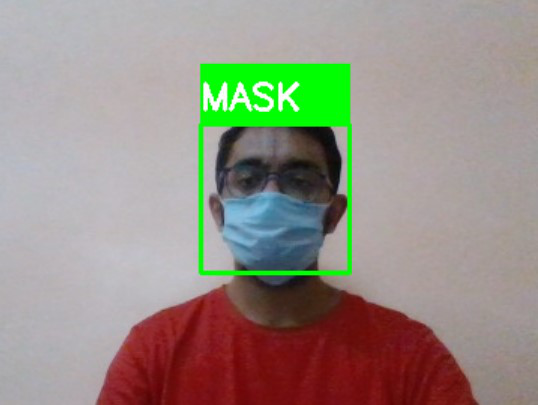

In [29]:
from PIL import Image
with_mask = Image.open("C:/Users/shri venkatakrishnan/OneDrive/Pictures/Camera Roll/with_mask.jpg")
with_mask

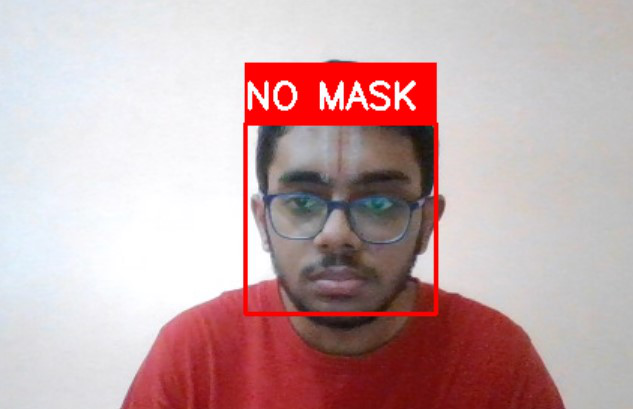

In [31]:
from PIL import Image
without_mask = Image.open("C:/Users/shri venkatakrishnan/OneDrive/Pictures/Camera Roll/without_mask.jpg")
without_mask